## Assignment 6 Neural Networks with Keras and TensorFlow:
Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | 12
Maële Belmont | 12

Download the notebook for this assignment. The notebook will provide a basis that you can
use to solve the exercises.
This assignment will work with the MNIST data set. The MNIST dataset is a standard
benchmark where small 28x28 pixel grayscale images of handwritten digits. Each image was
manually assigned to a class label, an integer from 0 to 9, by the US Census Bureau. The task
associated with the dataset is building a model that takes a new image (of the same size)
and returns a class label – that is, an integer from 0 to 9.
For this assignment, we will use the Keras framework to construct our neural networks. You
can read more about the Keras framework here https://keras.io/. You can find information
regarding the different layers and regularizers there. In this assignment, you can use free
GPU leases on Google Colab or deepnote to speed up training.

## What to submit:
•All Python code written.

• A report that includes the figures produced and the descriptions/discussions that are requested in the questions.

If you upload a zip file, please also upload any PDF files separately (so that they can be viewed more
conveniently in Canvas).

### Self-check
Is all the required information on the front page? Have you answered all questions to the best of your ability? Anything else you can easily check? (details, terminology, arguments, clearly stated
answers etc.?)  

### Grading
Grading will be based on a qualitative assessment of each assignment. It is important to:

• Present clear arguments
• Present the results in a pedagogical way
• Should it be table/plot? What kind of plot? Is everything clear and easy to
understand?
• Show understanding of the topics
• Give correct solutions.
• Make sure that the code is well commented.
• Important parts of the code should be included in the running text and the full
code uploaded to Canvas. 

### Code from DAT405_neural_networks notebook

In [12]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.utils import np_utils
import pandas as pd
import csv
import statistics
import numpy
import numpy as np

In [13]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

### 1. Preprocessing (1p)

In the notebook, the data is downloaded from an external server imported into the notebook
environment using the mnist.load_data() function call.
Explain the data pre-processing high-lighted in the notebook.

- It is worth mentioning that the MNIST dataset consists of 70,000 28x28 grayscale pictures, representing handwritten digits from 0 to 9. (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data#args). x_train consists of 60,000 of these pictures while x_test consists of the remaining 10,000 pictures. These pictures have a dtype of uint8, which is a data type containing a whole number from 0 up until 255. Each pixel has thus a value between 0 to 255. The training and test data sets are all divided by 255. This normalizes the data and gives us values between 0 and 1. The data has in other words been normalized. It is also worth noting that the conversion from integers to floating numbers were necessary in order to perform the division with accurate values.

- The lbl_train and lbl_test consist of vectors with integers between 0-9. Each vector is then converted into a binary class matrix, with 10 columns, with the use of to_categorical(). Essentially, this matrix consists of binary representations of each integer. For example, 2 would equal [0,0,1,0,0,0,0,0,0,0] (https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical). The num_classes parameter is set to 10 and represent the number of integers, 0-9) as well as the length of each vector. Finally, these two matrices are assigned to the variables y_train and y_test.

### 2. Network model, training, and changing hyper-parameters. (4p)

**2(A)**
How many layers does the network in the notebook have? How many neurons does each layer
have? What activation functions and why are these appropriate for this application? What is the
total number of parameters for the network? Why does the input and output layers have the
dimensions they have? <br>

These information can be found in the model summary table by uncommenting line 22 '#model.summary()' of the code cell in question 2(C).
- The network in the notebook has 4 layers:

n° | Layer name | Neurons in layer  
------------ | ------------ | ------------- 
1 | flatten_3 | 784 
2 | dense_12 | 64 
3 | dense_13 | 64 
4 | dense_14 | 10 


- The activation functions are 'relu' and 'softmax'. Since we are working with a large NN, relu is appropriate because it speeds up convergence in the training stage. Furthermore, it does not undergo the Vanishing gradient problem and is thus adequate for hidden layers in large NN. (ref.: [MLK](https://machinelearningknowledge.ai/keras-activation-layers-ultimate-guide-for-beginners/#What_is_an_Activation_Function))  The softmax activation function is appropriate because it assigns probabilities for a picture to each possible numbers [0,...,9]. The sum of the probabilities for each image is one. For example, let's say we have a picture with number 5 on it; the model might consider that it is number 5 with probability 50%, number 6 with probability 30%, number 8 with probability 11%, and number 9 with probability 9 %. Thanks to softmax, we know that the sum of the probabilities for the 10 classes [0,...,9] is one and the results are easy to interpret. (ref.: [datascience+](https://datascienceplus.com/mnist-for-machine-learning-beginners-with-softmax-regression/))      

- The total number of parameters for the network is 55,050.
- As mentioned in question 1, the MNIST dataset consists of 28x28 pictures making a total of 784 pixels per picture. These pixels, which are going to be analysed in the model, are stored in an array of size 784, explaining the dimension of the input array. The output array contains the probabilities for a picture to be each possible numbers [0,...,9]. Since there are 10 numbers, the dimension of the output is 10.    


##### 2(B)
What loss-function is used to train the network? What is the functional form (mathematical
expression) of the loss function? and how should we interpret it? Why is it appropriate for the
problem at hand?
- Categorical cross entropy loss function
- Functional form of the loss function: ...

##### 2(C)
Train the network for 10 epochs and plot the training and validation accuracy for each epoch

In [18]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

accuracies =[]

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0, # silence the background noice
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
accuracies.append(score)
#model.summary()
print('Test loss: ' + str(round(accuracies[0][0],4))+ '  Test accuracy: ' + str(round(accuracies[0][1],4)))

Test loss: 0.1028  Test accuracy: 0.97


In [8]:
# Method for savig data to csv.file
def saveOutput(list, name):
    file_name = '{}.csv'.format(name)
    
    with open(file_name, 'w', newline='') as file:
        if len(list[0])>=3:
             header = ['Factor', 'Loss', 'Test']
        else:
            header = ['Loss', 'Test']
        writer = csv.writer(file)   
        writer.writerow(header)
        for i in list:
             writer.writerow(i)          

In [9]:
# Save ouput of question 2C to csv.file
saveOutput(accuracies, '2C')

In [10]:
# Plotting for validation and accuracy of each epoch
def plotAccuracies(history):
    y = fit_info.history['accuracy']
    y2 = fit_info.history['val_accuracy']
 
    # Plot lists and show them
    plt.plot(y, label = "Training accuracy")
    plt.plot(y2, label = "Validation accuracy")

    # Plot axes labels and show the plot
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy for each epoch')
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    x = np.arange(0, 10, 1)
    plt.xticks(x)
    
    plt.show()

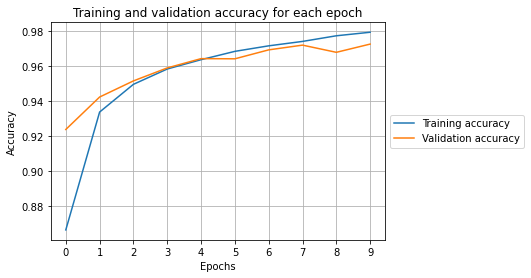

In [11]:
plotAccuracies(fit_info)

A test accuracy of 0.7726 was obtained, with a test loss of 0.0859. This is what we achieve with the use of of only two hidden layers and 64 hidden units each. 

##### 2(D)
Update model to implement a three-layer neural network where the hidden-layers has 500
and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you
can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a
validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2
regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight
decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train
3 replicates networks for each regularization factor. Plot the final validation accuracy with
standard deviation (computed from the replicates) as a function of the regularization factor. How
close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may
influence Model training) 

In [12]:
# Create a dataframe from csv.file
def createDataframe(csv_file):
    #df.columns=['Factor', 'Loss', 'Test']
    frame =  pd.read_csv(csv_file)
    pd.options.display.float_format = "{:,.10f}".format
    return frame

In [13]:
from tensorflow.keras import regularizers as reg

regFactors = [0.000001, 0.00001, 0.0001, 0.00015, 0.001]
accuracies_2 = []
print('Running...')
for factor in regFactors:
    print("... still running")
    # Train 3 replicates networks for each regularization factor
    for replicate in range(3): # 3 replicates
        
        ## Define model ##
        model = Sequential()

        # These are our 4 layers
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=reg.l2(factor))) ## Hidden layer
        model.add(Dense(300, activation = 'relu', kernel_regularizer=reg.l2(factor))) ## Hidden layer
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                       optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        fit_info_2 = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=40, # Train for 40 epochs
                   verbose=1, # Silence the background noice 
                   validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        accuracies_2.append((factor,score[0], score[1]))
print('Done!')

Running...
... still running
Epoch 1/40
469/469 [==============================] - 3s 6ms/step - loss: 0.4000 - accuracy: 0.8892 - val_loss: 0.2126 - val_accuracy: 0.9399
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1893 - accuracy: 0.9457 - val_loss: 0.1611 - val_accuracy: 0.9530
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1387 - accuracy: 0.9605 - val_loss: 0.1215 - val_accuracy: 0.9644
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1097 - accuracy: 0.9688 - val_loss: 0.1068 - val_accuracy: 0.9678
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0895 - accuracy: 0.9742 - val_loss: 0.0927 - val_accuracy: 0.9719
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0747 - accuracy: 0.9791 - val_loss: 0.0896 - val_accuracy: 0.9719
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0634 - accuracy: 0.9827 - val_loss: 0.0771 

469/469 [==============================] - 3s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9818
Epoch 36/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9817
Epoch 37/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 38/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 39/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 40/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9816
... still running
Epoch 1/40
469/469 [==============================] - 4s 8ms/step - loss: 0.4147 - accuracy: 0.8886 - val_loss: 0.2301 - val_accuracy: 0

469/469 [==============================] - 4s 8ms/step - loss: 0.0155 - accuracy: 0.9998 - val_loss: 0.0724 - val_accuracy: 0.9814
Epoch 30/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0151 - accuracy: 0.9998 - val_loss: 0.0732 - val_accuracy: 0.9813
Epoch 31/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0148 - accuracy: 0.9999 - val_loss: 0.0729 - val_accuracy: 0.9823
Epoch 32/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0146 - accuracy: 0.9999 - val_loss: 0.0726 - val_accuracy: 0.9818
Epoch 33/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0144 - accuracy: 0.9999 - val_loss: 0.0731 - val_accuracy: 0.9826
Epoch 34/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0142 - accuracy: 0.9999 - val_loss: 0.0742 - val_accuracy: 0.9814
Epoch 35/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9818
Epoch 36/40

469/469 [==============================] - 4s 8ms/step - loss: 0.0900 - accuracy: 0.9988 - val_loss: 0.1365 - val_accuracy: 0.9804
Epoch 24/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0882 - accuracy: 0.9989 - val_loss: 0.1346 - val_accuracy: 0.9814
Epoch 25/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0864 - accuracy: 0.9991 - val_loss: 0.1352 - val_accuracy: 0.9807
Epoch 26/40
469/469 [==============================] - 3s 7ms/step - loss: 0.0849 - accuracy: 0.9993 - val_loss: 0.1335 - val_accuracy: 0.9809
Epoch 27/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0831 - accuracy: 0.9994 - val_loss: 0.1326 - val_accuracy: 0.9810
Epoch 28/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0817 - accuracy: 0.9995 - val_loss: 0.1313 - val_accuracy: 0.9810
Epoch 29/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0801 - accuracy: 0.9995 - val_loss: 0.1309 - val_accuracy: 0.9805
Epoch 30/40

469/469 [==============================] - 3s 7ms/step - loss: 0.1323 - accuracy: 0.9963 - val_loss: 0.1688 - val_accuracy: 0.9812
Epoch 18/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1282 - accuracy: 0.9966 - val_loss: 0.1647 - val_accuracy: 0.9832
Epoch 19/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1244 - accuracy: 0.9975 - val_loss: 0.1623 - val_accuracy: 0.9827
Epoch 20/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1207 - accuracy: 0.9977 - val_loss: 0.1596 - val_accuracy: 0.9822
Epoch 21/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1176 - accuracy: 0.9980 - val_loss: 0.1560 - val_accuracy: 0.9832
Epoch 22/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1143 - accuracy: 0.9984 - val_loss: 0.1564 - val_accuracy: 0.9816
Epoch 23/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1114 - accuracy: 0.9984 - val_loss: 0.1526 - val_accuracy: 0.9831
Epoch 24/40

469/469 [==============================] - 3s 7ms/step - loss: 0.2666 - accuracy: 0.9836 - val_loss: 0.2718 - val_accuracy: 0.9759
Epoch 12/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2405 - accuracy: 0.9848 - val_loss: 0.2482 - val_accuracy: 0.9769
Epoch 13/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2188 - accuracy: 0.9858 - val_loss: 0.2257 - val_accuracy: 0.9782
Epoch 14/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1998 - accuracy: 0.9866 - val_loss: 0.2073 - val_accuracy: 0.9802
Epoch 15/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1845 - accuracy: 0.9868 - val_loss: 0.1965 - val_accuracy: 0.9799
Epoch 16/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1711 - accuracy: 0.9878 - val_loss: 0.1879 - val_accuracy: 0.9779
Epoch 17/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1598 - accuracy: 0.9883 - val_loss: 0.1841 - val_accuracy: 0.9766
Epoch 18/40

In [17]:
# Save ouput of question 2D to csv.file and dataframe
saveOutput(accuracies_2, '2D')
df_2D = createDataframe('2D.csv')

In [15]:
#Initialize 
means = []
sds = []
a = df_2D['Test']

# 1.Calculate the mean of each set of replicates
i = numpy.array([0,3,6,9,12]) # Starting indices 
j = i+2 # Stop indices

for k in range(len(i)):
    m = i[k] # Start
    n = j[k]+1 # Stop. Indexing differrs by +1 between array and dataframe
    
    mean = np.mean(a[m:n]) # Calculates the mean for 3 floats 
    means.append(mean) # Save it to the list 
    
    standard_dev = np.std(a[m:n]) # Calculates the sd for 3 floats
    sds.append(standard_dev) # Save it to the list 

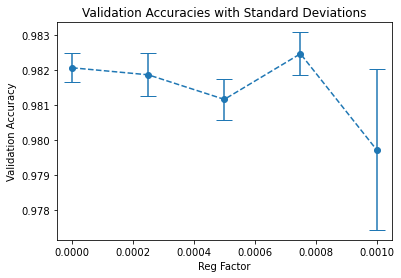

In [39]:
# Plot final validation accuracies with standard deviations

plt.xlabel("Reg Factor")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies with Standard Deviations")

regFactors = np.linspace(0.000001,0.001,5) # Same as regFactors
plt.scatter(regFactors, means)

plt.errorbar(regFactors, means, sds, linestyle='--', fmt='o', markersize=4, capsize=8)
plt.show()

In [37]:
print("Max validation accuracy: ", np.max(df_2D['Test']))
k = 0.9847-np.max(df_2D['Test'])
print('Approximately ' + str(round(k,4))+ ' below Hintons')

Max validation accuracy:  0.9832000136375428
Approximately 0.0015 below Hintons


Our validation accuracy is very close to that of Hinton's though it is not quite the same. Ours is 0.15 percentage points less. It is possible that, by increasing the replications, a greater validation accuracy could be achieved. As we are dealing with standard deviation of a very small sample, namely three points per regularization factor, each data point has 1/3 influence on the standard deviation, meaning that if we were to have many outliers, the validation accuracy would be affected likewise. The chosen learning rate-epochs pairs also influences the accuracy as well as the actual values chosen for the regularization factors. In other words, there are quite a few parameters involved in the algorithm, all which can influence the final validation accuracy.

<span style="color:red">INSERT COMMENT TO ABOVE ACCURACY SCORES</span>.

### 3.  Convolutional layers. (2p)

##### 3(A)
Design a model that makes use of at least one convolutional layer – how performant a model can
you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the
validation data. If you choose to use any layers apart from convolutional layers and layers that you
used in previous questions, you must describe what they do. If you do not reach 99% accuracy,
report your best performance and explain your attempts and thought process.

##### 3(B)
Discuss the differences and potential benefits of using convolutional layers over fully connected
ones for the particular application?

### 4. Auto-Encoders for denoising (3p)

##### 4(A)
The notebook implements a simple denoising deep autoencoder model. Explain what the model
does: use the data-preparation and model definition code to explain how the goal of the model is
achieved. Explain the role of the loss function? Draw a diagram of the model and include it in your
report. Train the model with the settings given.

In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)

In [ ]:
latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))

##### 4(B)
Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1).
Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised
versions (Hint: for visualization use imshow(), use the trained autoencoder to denoise the noisy
digits). At what noise level does it become difficult to identify the digits for you? At what noise level
does the denoising stop working?

##### 4(C)
Test whether denoising improves the classification with the best performing model you obtained
in questions 2 or 3. Plot the true-positive rate as a function of noise-level for the seasoned and
denoised datasets – assume that the correct classification is the most likely class-label. Discuss your
results. 

##### 4(D)
Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic
“hand-written” digits? – Describe the procedure and show examples in your report.